# Analysis for the Additional Treatments 

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ks_2samp
import itertools
from scipy.stats import epps_singleton_2samp
from scipy.stats import kstest
from scipy.stats import chisquare
from scipy.stats import brunnermunzel 

## Load Data

In [2]:
individual_df = pd.read_csv('/Users/aaronberman/Desktop/Altruism & Lying Aversion/data/additional_baseline/all_additional_treatments_dropbox_df.csv', index_col=0)

In [3]:
individual_df.columns

Index(['Duration (in seconds)', 'ResponseId', 'TimerInstrucs_First Click',
       'TimerInstrucs_Last Click', 'TimerInstrucs_Page Submit',
       'TimerInstrucs_Click Count', 'TimerInstrucsCont_First Click',
       'TimerInstrucsCont_Last Click', 'TimerInstrucsCont_Page Submit',
       'TimerInstrucsCont_Click Count', 'decision', 'nationality', 'gender',
       'Big5 Gosling 2003_1', 'Big5 Gosling 2003_2', 'Big5 Gosling 2003_3',
       'Big5 Gosling 2003_4', 'Big5 Gosling 2003_5', 'Big5 Gosling 2003_6',
       'Big5 Gosling 2003_7', 'Big5 Gosling 2003_8', 'Big5 Gosling 2003_9',
       'Big5 Gosling 2003_10', 'Location', 'Treatment'],
      dtype='object')

## Summary Statistics

### Chapman

In [4]:
chapman_participants = individual_df[individual_df['Location'] == 'Chapman']

# 'gender' counts
gender_counts_chapman = chapman_participants['gender'].value_counts()

# 'nationality' counts
nationality_counts_chapman = chapman_participants['nationality'].value_counts()

# 'Treatment' counts
treatment_counts_chapman = chapman_participants['Treatment'].value_counts()

# 'decision' counts
decision_counts_chapman = chapman_participants['decision'].value_counts()

print("Gender counts among Chapman participants:\n", gender_counts_chapman)
print("\nNationality counts among Chapman participants:\n", nationality_counts_chapman)
print("\nTreatment counts among Chapman participants:\n", treatment_counts_chapman)
print("\Decision counts among Chapman participants:\n", decision_counts_chapman)

Gender counts among Chapman participants:
 Female    78
Male      33
Other      1
Name: gender, dtype: int64

Nationality counts among Chapman participants:
 American    95
Other       14
Chinese      3
Name: nationality, dtype: int64

Treatment counts among Chapman participants:
 Stochastic       57
Deterministic    55
Name: Treatment, dtype: int64
\Decision counts among Chapman participants:
 5    71
4    22
3    11
2     6
1     2
Name: decision, dtype: int64


In [5]:
# Response time consideration
mean_duration_chapman = chapman_participants['Duration (in seconds)'].mean()
std_duration_chapman = chapman_participants['Duration (in seconds)'].std()
median_duration_chapman = chapman_participants['Duration (in seconds)'].median()

print(f"Mean Duration (in seconds): {mean_duration_chapman}")
print(f"Standard Deviation of Duration (in seconds): {std_duration_chapman}")
print(f"Median Duration (in seconds): {median_duration_chapman}")

Mean Duration (in seconds): 735.7410714285714
Standard Deviation of Duration (in seconds): 5777.010107243955
Median Duration (in seconds): 155.0


### Wuhan

In [6]:
wuhan_participants = individual_df[individual_df['Location'] == 'Wuhan']

# 'gender' counts
gender_counts_wuhan = wuhan_participants['gender'].value_counts()

# 'nationality' counts
nationality_counts_wuhan = wuhan_participants['nationality'].value_counts()

# 'Treatment' counts
treatment_counts_wuhan = wuhan_participants['Treatment'].value_counts()

# 'decision' counts
decision_counts_wuhan = wuhan_participants['decision'].value_counts()

print("Gender counts among Wuhan participants:\n", gender_counts_wuhan)
print("\nNationality counts among Wuhan participants:\n", nationality_counts_wuhan)
print("\nTreatment counts among Wuhan participants:\n", treatment_counts_wuhan)
print("\Decision counts among Wuhan participants:\n", decision_counts_wuhan)

Gender counts among Wuhan participants:
 Female               60
Male                 38
Prefer not to say     1
Name: gender, dtype: int64

Nationality counts among Wuhan participants:
 Chinese    99
Name: nationality, dtype: int64

Treatment counts among Wuhan participants:
 Deterministic    52
Stochastic       48
Name: Treatment, dtype: int64
\Decision counts among Wuhan participants:
 5    60
4    21
3    14
1     3
2     2
Name: decision, dtype: int64


In [7]:
mean_duration_wuhan = wuhan_participants['Duration (in seconds)'].mean()
std_duration_wuhan = wuhan_participants['Duration (in seconds)'].std()
median_duration_wuhan = wuhan_participants['Duration (in seconds)'].median()

print(f"Mean Duration (in seconds): {mean_duration_wuhan}")
print(f"Standard Deviation of Duration (in seconds): {std_duration_wuhan}")
print(f"Median Duration (in seconds): {median_duration_wuhan}")

Mean Duration (in seconds): 804.58
Standard Deviation of Duration (in seconds): 2723.173995487061
Median Duration (in seconds): 248.5


## PMFs

In [8]:
# Function to calculate PMF
def calculate_pmf(df, column):
    pmf = df[column].value_counts(normalize=True)
    pmf = pmf.sort_index()  # Sort by index for readability
    return pmf

In [17]:
# Define the combinations
combinations = [
    ('Chapman', 'Deterministic'),
    ('Chapman', 'Stochastic'),
    ('Wuhan', 'Deterministic'),
    ('Wuhan', 'Stochastic'),
]

# Iterate through combinations, calculate, and print PMFs
for location, treatment, in combinations:
    subset_df = individual_df[(individual_df['Location'] == location) & 
                   (individual_df['Treatment'] == treatment)]
    pmf = calculate_pmf(subset_df, 'decision')
    
    print(f"\nPMF for Location == {location}, Treatment == {treatment}\n", pmf)


PMF for Location == Chapman, Treatment == Deterministic
 2    0.018182
3    0.072727
4    0.181818
5    0.727273
Name: decision, dtype: float64

PMF for Location == Chapman, Treatment == Stochastic
 1    0.035088
2    0.087719
3    0.122807
4    0.210526
5    0.543860
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Deterministic
 2    0.019231
3    0.076923
4    0.173077
5    0.730769
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Stochastic
 1    0.062500
2    0.020833
3    0.208333
4    0.250000
5    0.458333
Name: decision, dtype: float64


In [18]:
def plot_pmf_by_combinations(df):   
    # Initialize an empty list to store all PMFs
    all_pmfs = []

    # Calculate PMF for each combination and store in the list
    for location, treatment in combinations:
        subset_df = df[(df['Location'] == location) & (df['Treatment'] == treatment)]
        pmf = subset_df['decision'].value_counts(normalize=True).sort_index()
        all_pmfs.append(pmf)

    # Determine the global max probability for consistent y-axis scaling
    max_probability = max(pmf.max() for pmf in all_pmfs)

    # Create the figure and subplots
    fig, axs = plt.subplots(len(combinations)//2, 2, figsize=(15, 20))
    axs = axs.flatten()  # Flatten to iterate easily
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, (location, treatment) in enumerate(combinations):
        pmf = all_pmfs[i]
        
        # Ensure every plot has bars for decisions 1 through 5, even if some have 0 probability
        decisions = range(1, 6)  # Assuming decisions go from 1 to 5
        probabilities = [pmf.get(decision, 0) for decision in decisions]
        
        axs[i].bar(decisions, probabilities, color='skyblue')
        axs[i].set_title(f'Location: {location}, Treatment: {treatment}')
        axs[i].set_xlabel('Decision')
        axs[i].set_ylabel('Probability')
        axs[i].set_ylim(0, max_probability + 0.05)  # Add a little padding to the max probability
        axs[i].set_xticks(decisions)

    plt.tight_layout()
    plt.show()

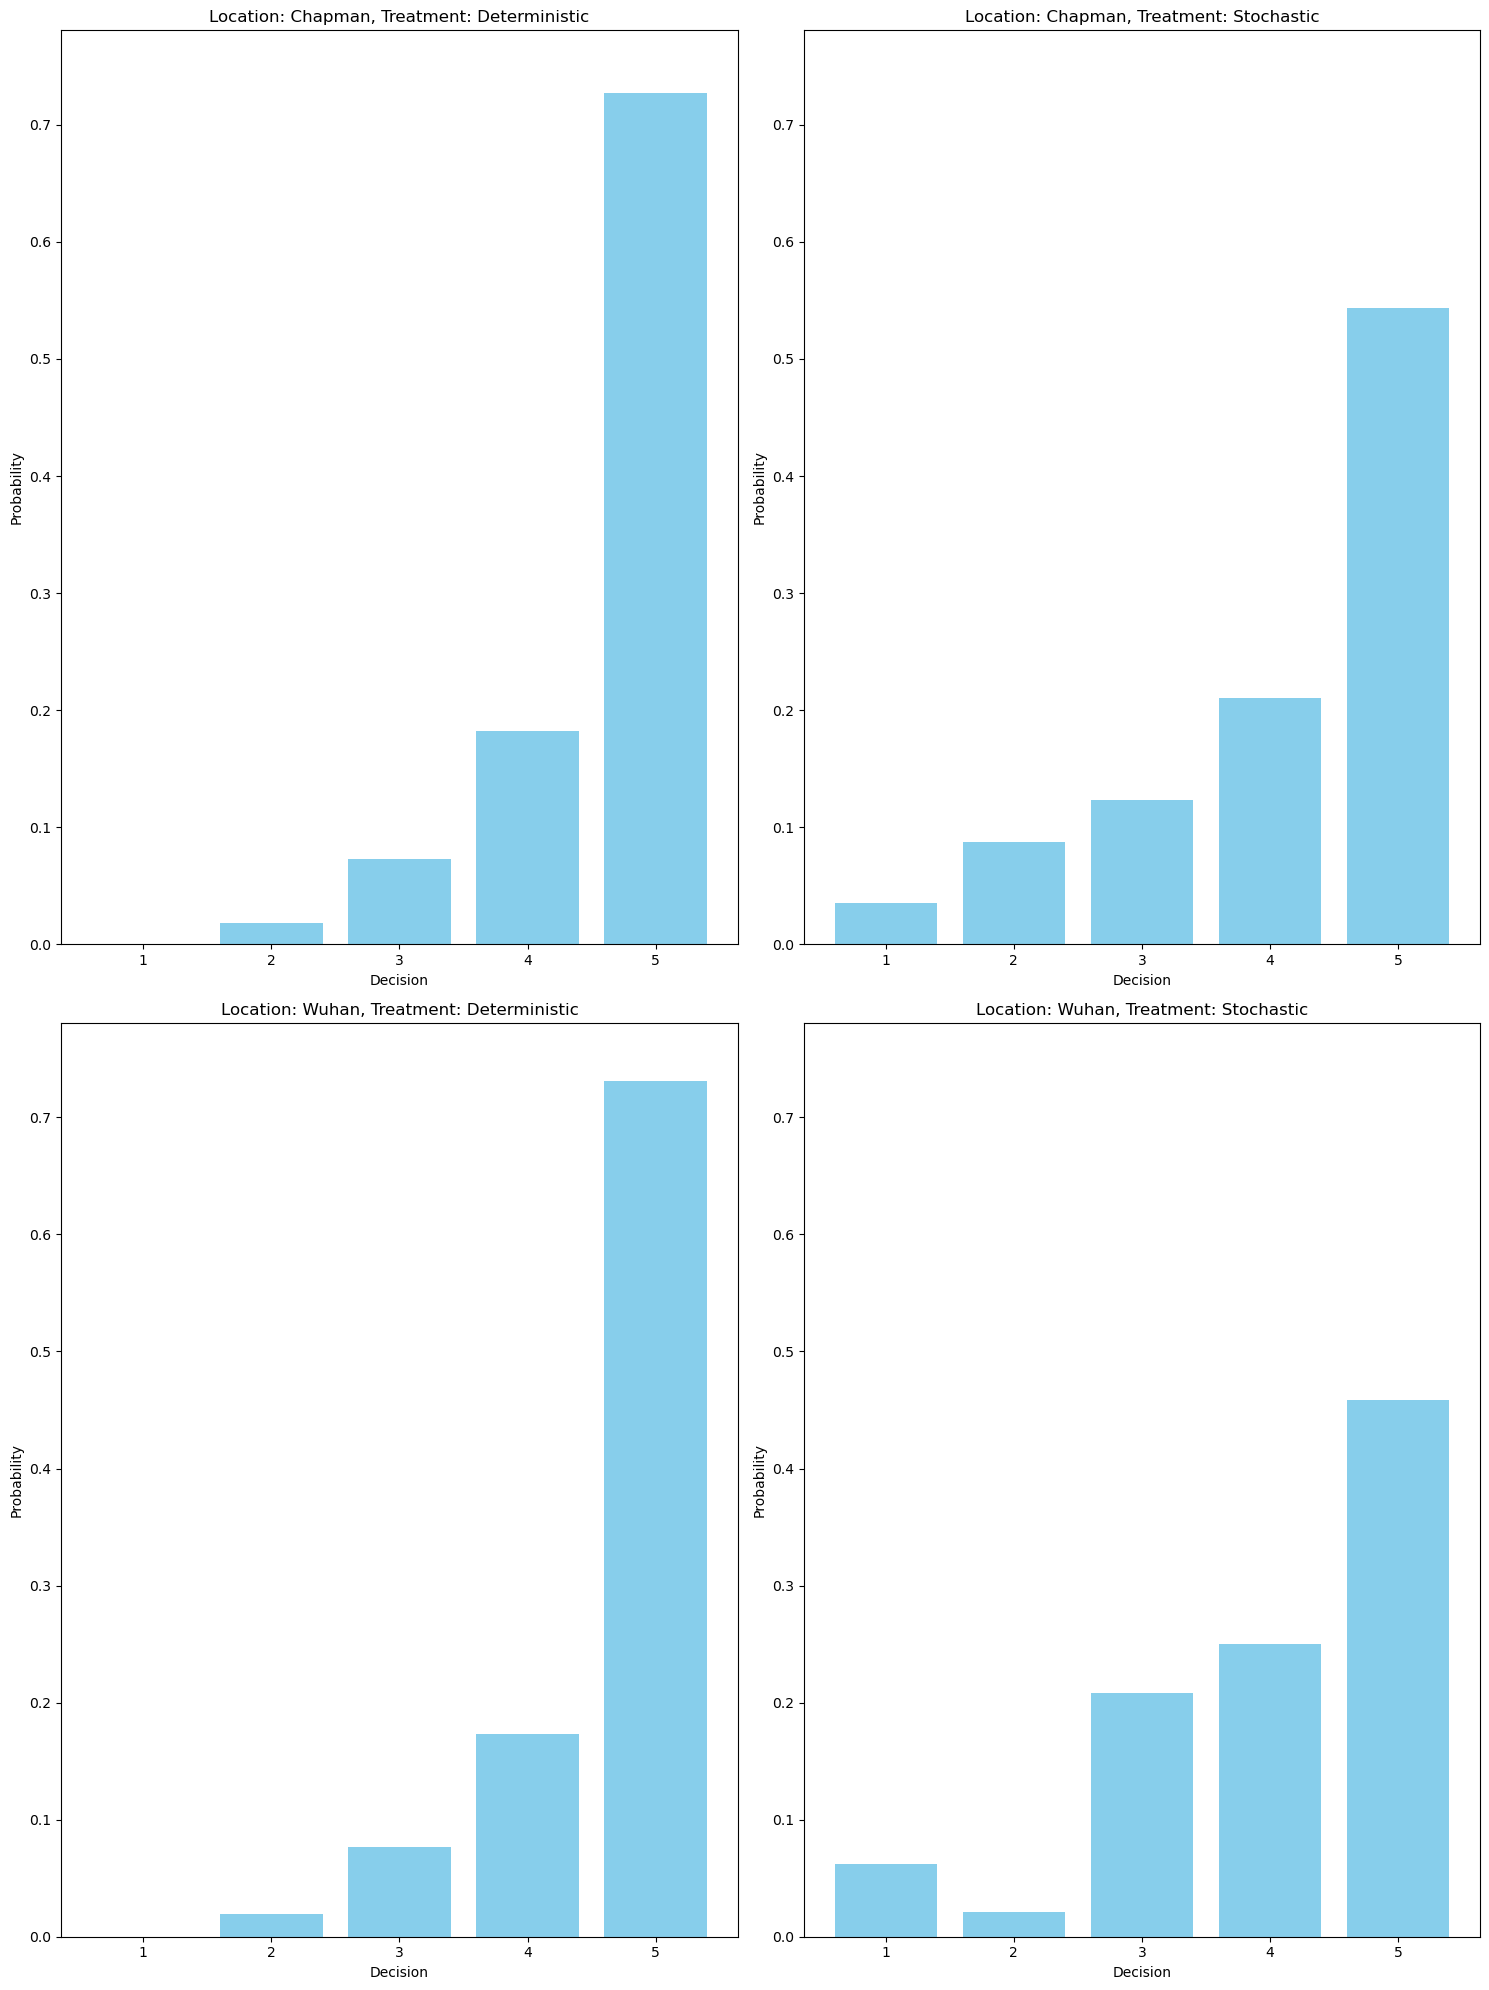

In [19]:
plot_pmf_by_combinations(individual_df)

## Statistical Tests

In [26]:
# Create a new column that combines the 'Location', 'Treatment', and 'Partner' into a single group identifier
individual_df['Group'] = individual_df['Location'] + ', ' + individual_df['Treatment'] 


### Chi-Squared

In [28]:
def perform_chi_squared_tests_for_pairs(df, group_by_col, decision_col='decision'):
    """
    Perform Chi-squared tests on the distribution of a decision variable across pairwise combinations of treatments.
    
    Parameters:
    - df: The pandas DataFrame containing your data.
    - group_by_col: Column name for grouping, typically 'Treatment' or similar.
    - decision_col: The decision column to test, defaults to 'decision'.
    
    Returns:
    - results: A list of dictionaries containing results for each pair.
    """
    results = []
    treatments = df[group_by_col].unique()
    pairs = itertools.combinations(treatments, 2)  # Get all unique pairs of treatments

    for treatment1, treatment2 in pairs:
        # Filter data for each treatment in the pair
        sub_df = df[df[group_by_col].isin([treatment1, treatment2])]
        
        # Create a contingency table
        contingency_table = pd.crosstab(sub_df[decision_col], sub_df[group_by_col])
        
        # Perform the Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Append the results
        results.append({
            'Treatment Pair': f'{treatment1} vs {treatment2}',
            'Chi2 Statistic': chi2,
            'P-value': p,
            #'Degrees of Freedom': dof,
            #'Expected Frequencies': expected
        })

    return results

In [29]:
results = perform_chi_squared_tests_for_pairs(individual_df, 'Group')
for result in results:
    print(result)

{'Treatment Pair': 'Chapman, Deterministic vs Chapman, Stochastic', 'Chi2 Statistic': 6.77395751435781, 'P-value': 0.14832670420625776}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Stochastic', 'Chi2 Statistic': 10.55206206916251, 'P-value': 0.032087354901427736}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Deterministic', 'Chi2 Statistic': 0.01981705878467012, 'P-value': 0.999262440376773}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Stochastic', 'Chi2 Statistic': 4.183689054072472, 'P-value': 0.3817166574941492}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 6.407690104200402, 'P-value': 0.17070037420247258}
{'Treatment Pair': 'Wuhan, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 10.122863247863249, 'P-value': 0.03840814969836484}


### Epps-Singleton

In [30]:
# Chapman | Deterministic vs Stochastic
sample1 = individual_df[(individual_df['Location'] == 'Chapman') & (individual_df['Treatment'] == 'Deterministic')]['decision']
sample2 = individual_df[(individual_df['Location'] == 'Chapman') & (individual_df['Treatment'] == 'Stochastic')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 7.356774233648693, P-value: 0.1181933188816434


In [31]:
# Wuhan | Deterministic vs Stochastic
sample1 = individual_df[(individual_df['Location'] == 'Wuhan') & (individual_df['Treatment'] == 'Deterministic')]['decision']
sample2 = individual_df[(individual_df['Location'] == 'Wuhan') & (individual_df['Treatment'] == 'Stochastic')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 10.875072302721337, P-value: 0.02800449433729857


In [32]:
# Deterministic | Chapman vs Wuhan
sample1 = individual_df[(individual_df['Location'] == 'Chapman') & (individual_df['Treatment'] == 'Deterministic')]['decision']
sample2 = individual_df[(individual_df['Location'] == 'Wuhan') & (individual_df['Treatment'] == 'Deterministic')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 0.01982420832057621, P-value: 0.9992620427801501


/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_hypotests.py:131: UserWarning: Estimated covariance matrix does not have full rank. This indicates a bad choice of the input t and the test might not be consistent.
  warnings.warn('Estimated covariance matrix does not have full rank. '


In [33]:
# Stochastic | Chapman vs Wuhan
sample1 = individual_df[(individual_df['Location'] == 'Chapman') & (individual_df['Treatment'] == 'Stochastic')]['decision']
sample2 = individual_df[(individual_df['Location'] == 'Wuhan') & (individual_df['Treatment'] == 'Stochastic')]['decision']

# Perform the Epps-Singleton test
statistic, p_value = epps_singleton_2samp(sample1, sample2)
print(f"Epps-Singleton Test Statistic: {statistic}, P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 4.531289713435836, P-value: 0.33885343588689115
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### One-Sample

In [22]:
stochastic_df = individual_df[individual_df['Treatment'] == 'Stochastic']

#### Chi-Squared

In [25]:
unique_decisions = [1, 2, 3, 4, 5]
num_decisions = len(unique_decisions)

# Perform the Chi-squared test for each group where Treatment == 'Lie'
results = []
for group, group_df in stochastic_df.groupby(['Location']):
    # Count occurrences of each decision
    observed_frequencies = group_df['decision'].value_counts().reindex(unique_decisions, fill_value=0)
    expected_frequencies = [len(group_df) / num_decisions] * num_decisions  # Uniform expected frequencies

    # Chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

    results.append({
        'Group': group,
        'Chi2 Statistic': chi2_stat,
        'P-value': p_value
    })

# Display the results
for result in results:
    print(result)

{'Group': 'Chapman', 'Chi2 Statistic': 46.77192982456141, 'P-value': 1.7011571278480278e-09}
{'Group': 'Wuhan', 'Chi2 Statistic': 28.875000000000004, 'P-value': 8.28801232290047e-06}


/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_20356/3857729372.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, group_df in stochastic_df.groupby(['Location']):
